In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

'''第一步：读取数据并分词'''
data = pd.read_csv('comment.csv')
print(data)
print(u"获取第一列内容")
col = data.iloc[:, 0]  # 取表中的第1列的所有值
arrs = col.values  # 取表中所有值
print(arrs)
stopwords = {}.fromkeys(['，', '。', '！', '这', '我', '非常'])  # 去除停用词

print('---------------------------------------------------------')
print(u"\n中文分词后结果")
print('---------------------------------------------------------')
corpus = []
for a in arrs:
    seglist = jieba.cut(a, cut_all=False)
    final = ''
    for seg in seglist:
        if seg not in stopwords:
            final = final + seg
    seg_list = jieba.cut(final, cut_all=False)
    output = ' '.join(list(seg_list))
    print(output)
    corpus.append(output)
print('---------------------------------------------------------')
print(corpus)


                               内容  评价
0             这是一本非常优秀的书籍，值得读者购买。  好评
1  Python技术非常火热，这也是一本很好的数据，读者很用心。  好评
2                    数据逻辑比较混乱，差评。  差评
3         这是我见过最差的一本Python数据分析书籍。  差评
4             好评，非常好的一本书籍，值得大家学习。  好评
5                     差评，简直是误人子弟。  差评
6     书籍作者还是写得比较认真的，但是思路有点乱，需优化下。  差评
7       强烈推荐大家购买这本书籍，这么多年难得一见的好书。  好评
8                 一本优秀的书籍，值得读者拥有。  好评
9                   很差，不建议买，准备退货。  差评
获取第一列内容
['这是一本非常优秀的书籍，值得读者购买。' 'Python技术非常火热，这也是一本很好的数据，读者很用心。' '数据逻辑比较混乱，差评。'
 '这是我见过最差的一本Python数据分析书籍。' '好评，非常好的一本书籍，值得大家学习。' '差评，简直是误人子弟。'
 '书籍作者还是写得比较认真的，但是思路有点乱，需优化下。' '强烈推荐大家购买这本书籍，这么多年难得一见的好书。'
 '一本优秀的书籍，值得读者拥有。' '很差，不建议买，准备退货。']
---------------------------------------------------------

中文分词后结果
---------------------------------------------------------
这是 一本 优秀 的 书籍 值得 读者 购买
Python 技术 火热 也 是 一本 很 好 的 数据 读者 很 用心
数据 逻辑 比较 混乱 差评
是 见 过 最差 的 一本 Python 数据分析 书籍
好评 好 的 一本 书籍 值得 大家 学习
差评 简直 是 误人子弟
书籍 作者 还是 写得 比较 认真 的 但是 思路 有点 乱 需 优化 下
强烈推荐 大家 购买 这本 书籍 这么 多年 难得一见 的 好书
一本 优秀 的 书籍

In [10]:
'''第二步：计算词频'''
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
for w in word:
    print(w),
print('')
print(X.toarray())
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()
for i in range(len(weight)):
    print(u'------这里输出第', i, u'条文本的tf-idf权重------')
    for j in range(len(word)):
        print(word[j], weight[i][j])

python
一本
书籍
优化
优秀
但是
作者
值得
写得
准备
多年
大家
好书
好评
学习
差评
建议
强烈推荐
很差
思路
技术
拥有
数据
数据分析
最差
有点
比较
混乱
火热
用心
简直
认真
误人子弟
读者
购买
还是
这么
这是
这本
退货
逻辑
难得一见

[[0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
  0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 1 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
  0 0 0 0 0 0]
 [0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
  0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  1 0 1 0 0 1]
 [0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

In [11]:
matrix = pd.DataFrame(X.toarray())
matrix

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,1,1,0,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
8,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
'''第三步：数据分析'''
X = X.toarray()
x_train = X[:8]
x_test = X[8:]
y_train = [1, 1, 0, 0, 1, 0, 0, 1]
y_test = [1, 0]  # 1表示好评，0表示差评

clf = MultinomialNB().fit(x_train, y_train)
pre = clf.predict(x_test)
print(u'预测结果：', pre)
print(u'真是结果：', y_test)
print(classification_report(y_test, pre))
print(precision_recall_curve(y_test, pre))

预测结果： [1 0]
真是结果： [1, 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

(array([1., 1.]), array([1., 0.]), array([1]))


[[-1.34314702  0.35644264]
 [-0.56396691 -1.4496199 ]
 [ 1.05888425 -0.98567485]
 [-0.38808799 -0.21545423]
 [-0.7659945   0.51966218]
 [ 0.62849659 -0.62582101]
 [ 2.07818384  0.93457599]
 [-0.07289849  1.95409264]
 [-1.19312424  0.06431941]
 [ 0.56165447 -0.55252287]]


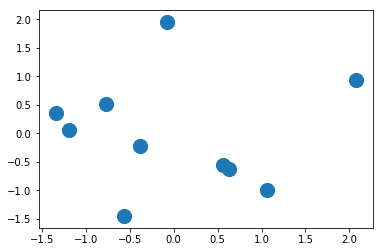

In [16]:
pca = PCA(n_components=2)
newData = pca.fit_transform(X)
print(newData)
Y = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
L1 = [n[0] for n in newData]
L2 = [n[1] for n in newData]
plt.scatter(L1, L2,s=200)
plt.show()